#  Haline Driving Spatial Distibutions 

Mean Haline Driving over final year for Ocean1-COM experiment


In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cftime
import cmocean as cm

from netCDF4 import Dataset
import os.path
import matplotlib.colors as colors

Models: 
```
COCO   MITgcm-BAS          MITgcm-JPL  MOM6_SIGMA_ZSTAR  NEMO-CNRS      POP2x
FVCOM  MITgcm_BAS_Coupled  MOM6        MPAS-Ocean        NEMO-UKESM1is  ROMS-UTAS
```

In [2]:
## folder where the isomip-plus github repo is located
baserepo = '/home/xylar/Documents/Manuscripts/2024/isomip_plus/isomip-plus/'
## folder where you downloaded the zipped Google Drive data
basedrive = '/home/xylar/data/isomip_plus/ISOMIP+Data 2/'

# load the data from the text files, which point to the right location of the file in the drive structure
Ocean0_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean0_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)


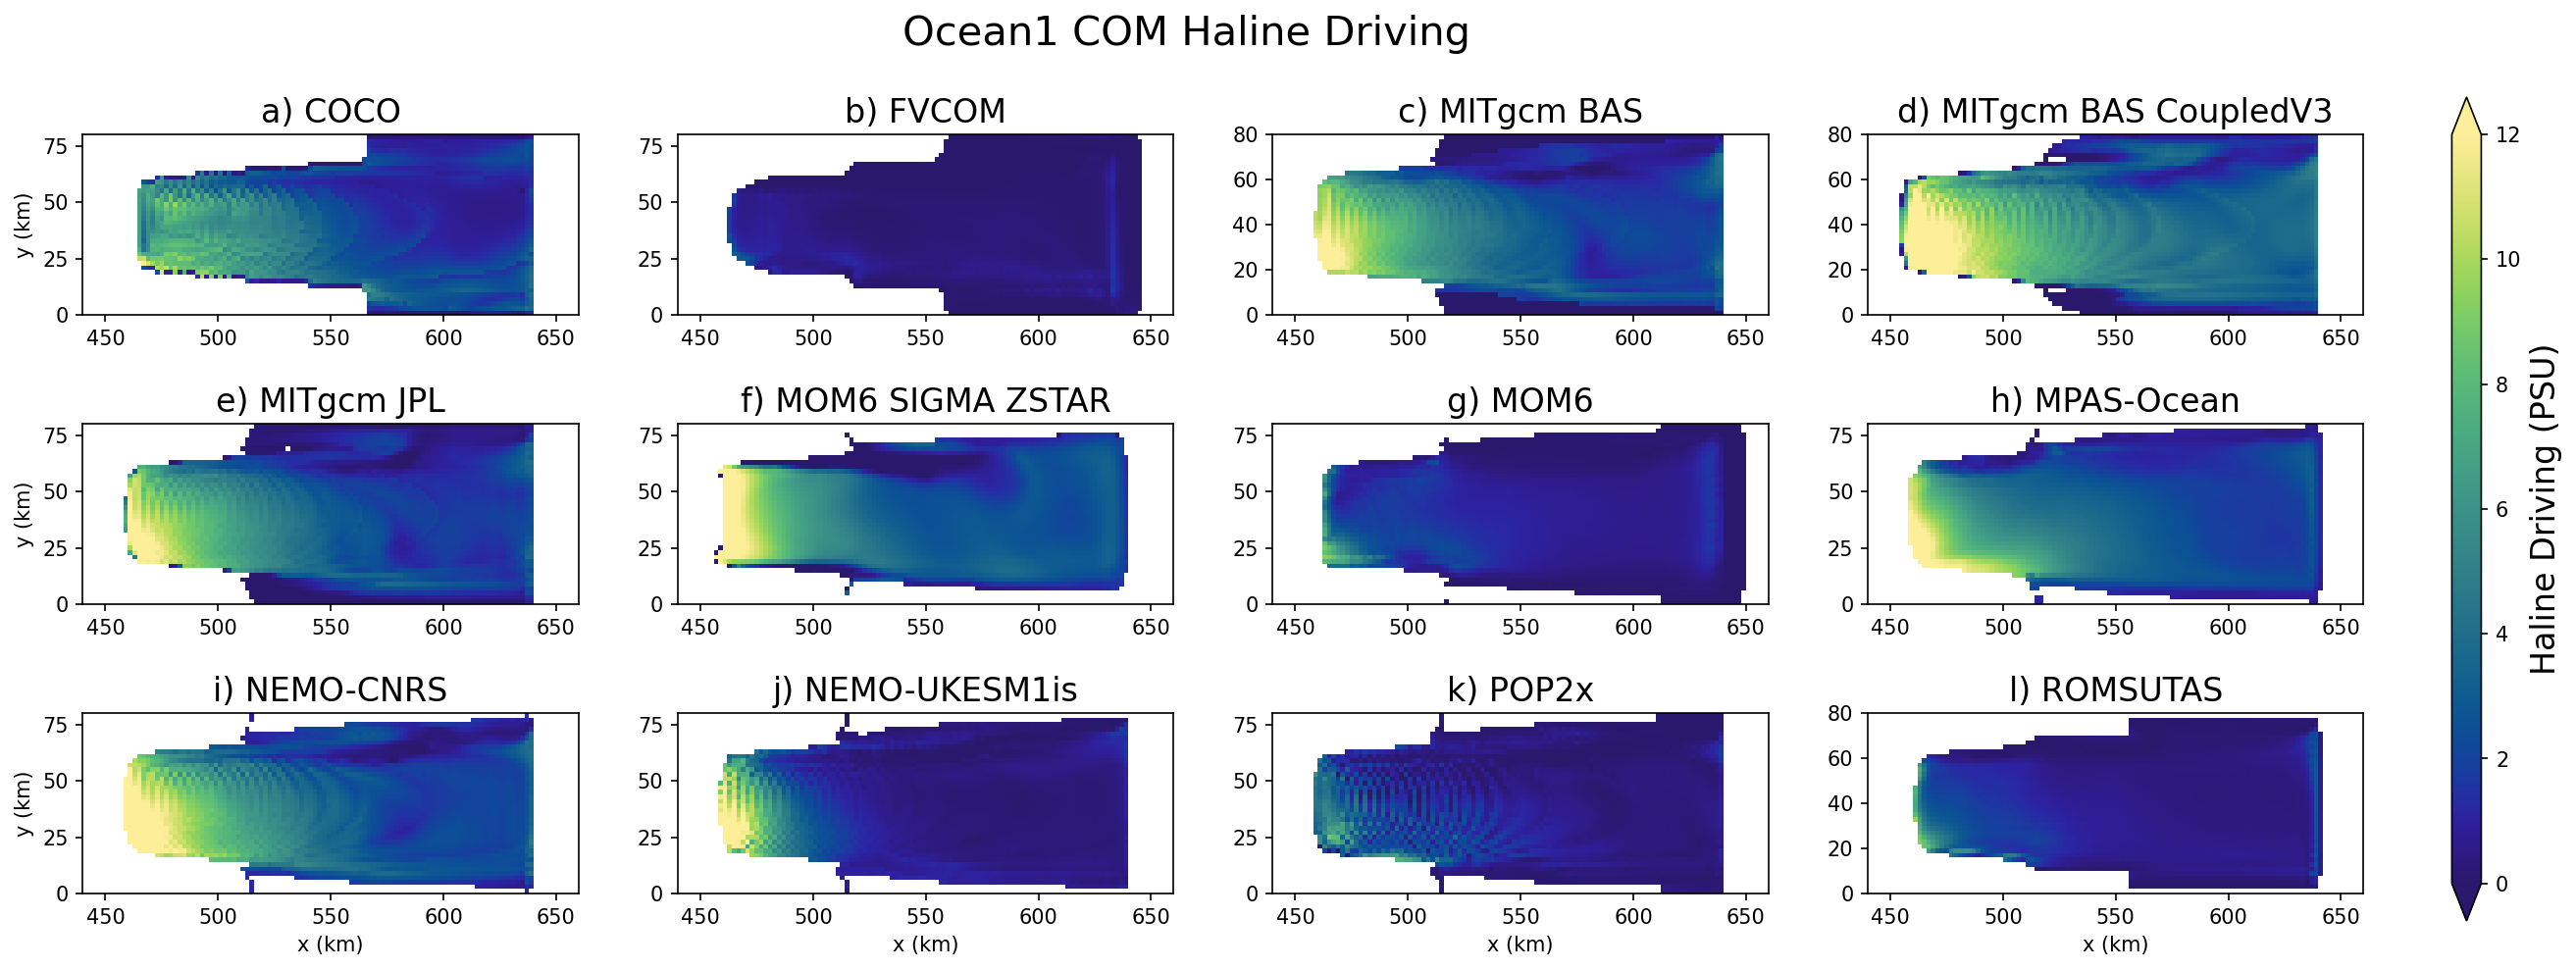

In [3]:
expt = Ocean1_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive + fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))
fig = plt.figure(figsize=(20, 7),facecolor='w',dpi = 150)
time = 12

vmin = 0.
vmax = 12.

xlim = [440., 660.]

for i in np.arange(length):
    plt.subplot(3,nrows,i+1)
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    hd = ds.halineDriving.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # mr < 1e36 is to get rid of fill values.
    hd = hd.where(hd < 1e36)
    mesh = plt.pcolormesh(
        1e-3 * ds.x.values, 1e-3 * ds.y.values, hd.values, 
        cmap=cm.cm.haline, vmin=vmin, vmax=vmax, shading='nearest')
    plt.xlim(xlim)
    mesh.axes.set_aspect('equal')
    
    plt.title(f'{alphabet[i]}) {labels[i]}', fontsize=16)
    if (i==0) or (i==4) or (i==8):
        plt.ylabel('y (km)')
    else:
        plt.ylabel('')
    if i>=8:
        plt.xlabel('x (km)')
    else:
        plt.xlabel('')

cax = plt.axes([0.93, 0.1, 0.01, 0.8])
cbar = plt.colorbar(mesh, cax=cax, extend='both')
cbar.ax.set_ylabel(r'Haline Driving (PSU)', fontsize=16)
fig.subplots_adjust(wspace = 0.2, hspace = 0.35)

fig.suptitle('Ocean1 COM Haline Driving', fontsize=20);